In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv("../input/bike-sharing-demand/test.csv", parse_dates=["datetime"])
train_df = pd.read_csv("../input/bike-sharing-demand/train.csv", parse_dates=["datetime"])

# parse_dates를 통해 string으로 저장된 데이터를 datetime으로 바꿔줌 (형변환)

In [3]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index()
all_df.head()

# 그냥 concat 하면 index 중복이 일어남
# 처음은 train_df

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [4]:
all_df.tail()
# 마지막은 test_set

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17378,6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


- casual : 그냥 빌리는 사람
- registered : 등록을 하고 빌리는 사람

- train 값으로 처음에 학습, test 값으로 체크를 해야함
- 먼저 concat으로 합침 (똑같은 기준으로 feature engineering을 해야하므로)

In [5]:
# train data의 size만큼의 index 만들기
train_index = list(range(len(train_df)))

# test data는 train data 이후부터 모두
test_index = list(range(len(train_df), len(all_df)))
test_index[0]

10886

In [6]:
# 결측치 찾기
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

- casual, registered, count
  - test에는 존재하지 않고 train data에만 존재함
  - 사실상 null 값이 존재하지 않는다라고 생각하면 됨! (다 같으므로)

In [7]:
x = np.array([np.inf, -np.inf, np.nan, -128, 128])
x

array([  inf,  -inf,   nan, -128.,  128.])

In [8]:
np.nan_to_num(x)

# na_to_num : nan값을 숫자로 만들어줌

# inf number은 가장 큰 값으로
# nan 값은 굉장히 작은 값으로

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$

In [9]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))


# y: 실제값 / y_: 예측치
# 0보다 작을 때는 nan_to_num을 이용해 0보다는 조금 큰 값으로 만들기

In [10]:
# 제출 형식 보기
submission_df = pd.read_csv("../input/bike-sharing-demand/sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [11]:
# 구해지는구나~
rmsle(submission_df["count"].values,
     np.random.randint(0, 100, size=len(submission_df)))

3.759491186539689

In [12]:
# 쓸모 없는 값 날려주기
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

In [13]:
# **
pd.get_dummies(
    all_df["season"])

# 이렇게 나오면 뭔지 모르므로 prefix를 정해주는 것!

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17374,1,0,0,0
17375,1,0,0,0
17376,1,0,0,0
17377,1,0,0,0


In [14]:
# **
pd.get_dummies(all_df["season"], prefix="season")

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17374,1,0,0,0
17375,1,0,0,0
17376,1,0,0,0
17377,1,0,0,0


In [15]:
pre_df = all_df.merge(pd.get_dummies(
    all_df["season"], prefix="season"), 
                      left_index=True, right_index=True)
pre_df.head()

# 'season'이라는 데이터를 one-hot-encoding하기 위해 get_dummies 이용
# merge를 시켜줌 (제일 처음 값(season)은 그대로 두고)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0


In [16]:
# weather도 마찬가지로
pre_df = pre_df.merge(pd.get_dummies(
    all_df["weather"], prefix="weather"),
                     left_index=True, right_index=True)

pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0


In [17]:
print(len(pre_df["datetime"].unique()))
print(pre_df["datetime"].unique())

# index와 거의 똑같은 역할 (안 씀)
# 제출을 할 때 index의 값으로 제출이 됨

17379
['2011-01-01T00:00:00.000000000' '2011-01-01T01:00:00.000000000'
 '2011-01-01T02:00:00.000000000' ... '2012-12-31T21:00:00.000000000'
 '2012-12-31T22:00:00.000000000' '2012-12-31T23:00:00.000000000']


In [18]:
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.weekday

# Y-M-D-H-W 이렇게 뽑아줄 수 있음
# feature들을 새로 생성해줌

In [19]:
# 요일은 다시 원핫인코딩으로
pre_df = pre_df.merge(pd.get_dummies(
    pre_df["weekday"], prefix="weekday"), 
                     left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,0,0,0,0,0,1,0


In [20]:
# 데이터 타입 확인
pre_df.dtypes

# real number가 아닌 데도 불구하고 int로 저장된 값들 (season_1, season_2, ...)
# -> 바꿔주는 것이 좋다.

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [21]:
# 그런 값들은 주로 따로 저장! (카테고리 데이터들로))
# 맨 나중에 해줘도 됨

category_variable_list = ["season","weather","workingday",
    "season_1","season_2","season_3","season_4","weather_1",
    "weather_2","weather_3","weather_4","year","month","day",
    "hour","weekday","weekday_0","weekday_1","weekday_2",
    "weekday_3","weekday_4","weekday_5","weekday_6"]

for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [22]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

- feature들과 count와의 관계를 확인해보자

In [23]:
train_df = pre_df.iloc[train_index]

# index로 이용
# 전처리 해주기 위해 train data 따로 넣어줌

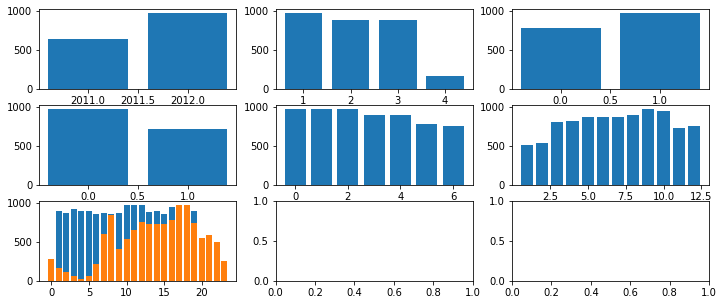

In [24]:
# y의 값과 다른 변수들이 어떤 상관관계 있는지

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(12, 5)

axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][0].bar(train_df["hour"], train_df["count"])
plt.show()

In [25]:
# **
# 월별로 자전거를 얼마나 빌렸는지
train_df.groupby(["month"])["count"].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In [26]:
series_data = train_df.groupby(["month"])["count"].mean()

In [27]:
series_data.index.tolist()[:5]

[1, 2, 3, 4, 5]

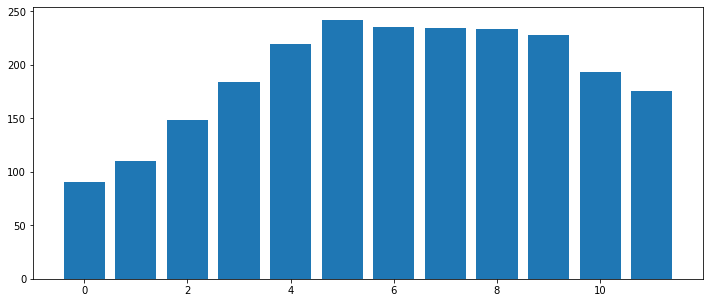

In [28]:
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12, 5)
plt.show()

# 여름에 더 많이 빌리고, 저녁에 조금 빌리구나

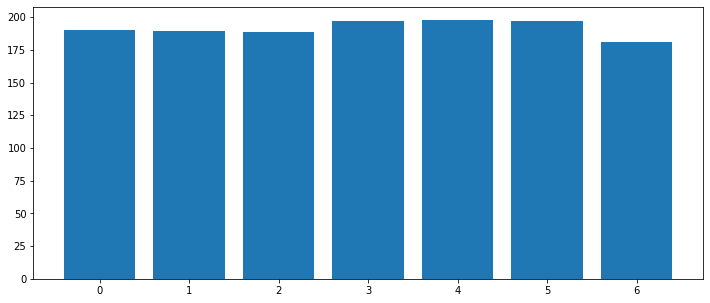

In [29]:
# **
# 요일별로
series_data = train_df.groupby(["weekday"])["count"].mean()

fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12, 5)
plt.show()

# 요일별로는 거의 상관관계가 없구나. 빼버릴까?

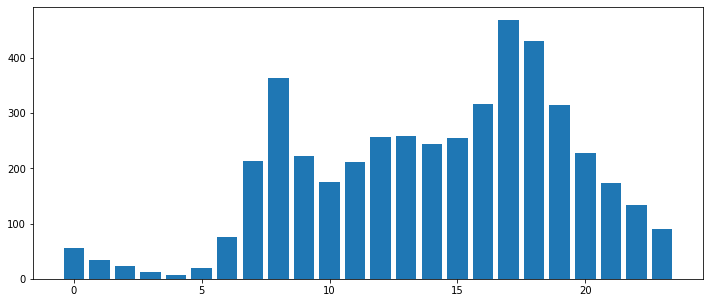

In [30]:
# **
# 시간별로
series_data = train_df.groupby(["hour"])["count"].mean()

fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12, 5)
plt.show()

# 출퇴근시간에 자전거 많이 빌리는구나!

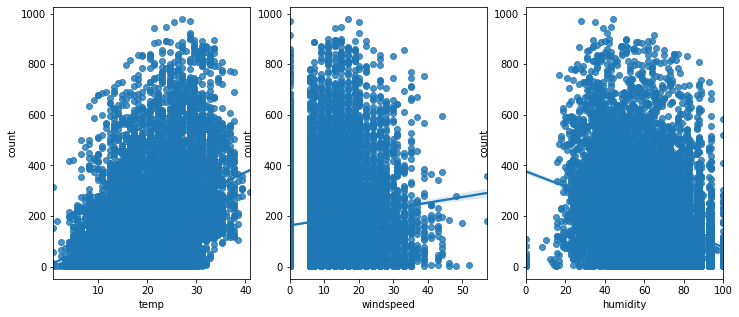

In [31]:
import seaborn as sn

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)

sn.regplot(x="temp", y="count", data=train_df, ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df, ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df, ax=ax3)
plt.show()

- 다른 사람들의 EDA 찾아보기

- windspeed에서 0인 값
  - 실제로 바람이 없는 것보단, 기록이 안 되었을 가능성이 크다!
  - 이를 예측하는 프로그램을 다시 만들어보는 것
  - 0인 값을 실제 값으로 변형시키기
     - windspeed를 예측하는 모델을 다시 만들기
     - 존재하는 다른 데이터 요일, 날짜, 사람들 얼마나 빌렸다 등의 데이터... 들을 이용해 역으로 예측하는 모델 -> 비어있는 칸들을 예측하는 모델의 값으로 넣음
     - (빈 값은 다른 Regression을 써서 새로 채워넣기!)

In [32]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

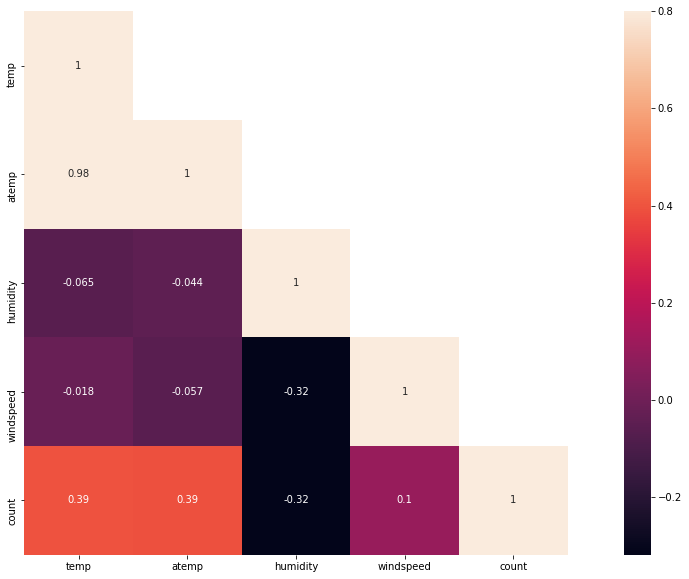

In [33]:
corrMatt = train_df[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
plt.show()

- atemp & temp의 관계 거의 비슷 -> 하나만 사용해도 ok
- windspeed & count의 관계 거의 없음 -> 제거해도 ok

In [34]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [35]:
continuous_variable_list = ["temp", "humidity", "windspeed", "atemp"]

In [36]:
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [37]:
category_variable_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

In [38]:
all_variable_list = continuous_variable_list + category_variable_list

In [39]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)

In [40]:
all_variable_list

# 사실 이런 방법은 잘 안 씀
# 전체를 실험해보자 (너무 많으니 10-15개만)

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [41]:
number_of_variables = len(all_variable_list)
number_of_variables

15

In [42]:
variable_combinations = []

import itertools

for L in range(14, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset: # week가 하나만 들어갈 순 없어서 전체 다 포함하도록
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        variable_combinations.append(temp)
    

# combination의 개수만큼 list에서 경우의 수를 다 뽑아줌
# 전체 variable(all_variable_list)중 L개만큼 뽑아줌

# 뽑아서 combination들 다 저장해줌

In [43]:
variable_combinations[:2]

# 모든 경우의 수를 다 뽑아 따로 저장

[['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'year',
  'hour',
  'season_1',
  'season_2',
  'season_3',
  'season_4',
  'weather_1',
  'weather_2',
  'weather_3',
  'weather_4'],
 ['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'year',
  'hour',
  'season_1',
  'season_2',
  'season_3',
  'season_4',
  'weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [44]:
del pre_df["count"]

- RMSE가 작을수록 좋다.
- Ridge & Lasso & LR
- 10~15

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

kf = KFold(n_splits=10) # KFold를 사용해 10번 train_set를 나눠줌

y = train_df["count"].values
final_output = []
models = []

print(len(variable_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(variable_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
    
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    
    # 100번이 돌아갈 때마다 걸린 시간 찍어줌
    # 언제쯤 모델이 완성될까 .. 감을 잡아줌
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf - ts  
        print(i, te)
        ts = datetime.datetime.now()

16


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/

0 0:00:00.962045


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/

In [46]:
labels = ["combination", "lr", "ridge", "lasso"]

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df.head()

,combination,lr,ridge,lasso
0,0,1.337135,1.322300,1.303500
1,1,1.323790,1.323741,1.309643
2,2,1.344359,1.322538,1.309016
3,3,1.471683,1.461893,1.435222
4,4,1.327257,1.316650,1.305703


In [47]:
result_df.min()

combination    0.000000
lr             1.319502
ridge          1.316650
lasso          1.303500
dtype: float64

In [48]:
result_df["lasso"].sort_values().head()

0     1.303500
14    1.304744
12    1.305013
4     1.305703
11    1.305956
Name: lasso, dtype: float64

In [49]:
variable_combinations[0]

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4']

In [50]:
target_df = pre_df[variable_combinations[0]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index] # test_index 값 넣어주기
X_submission_test.shape

(6493, 20)

In [51]:
X_submission_test

array([[-1.23077877, -0.34847267,  1.61850352, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.59500584,
        -0.29817742, -0.01313971],
       ...,
       [-1.23077877, -0.14113744, -0.21169121, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877, -0.34847267, -0.45609864, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877,  0.11803159, -0.45609864, ..., -0.59500584,
        -0.29817742, -0.01313971]])

In [52]:
models[0][2]

Lasso()

In [53]:
final_result = models[0][2].predict(X_submission_test)
final_result[final_result < 0] = 0

In [54]:
final_result

array([  0.        ,   0.        ,   0.        , ..., 283.34765875,
       298.95158826, 290.11400255])

In [55]:
pre_df.iloc[test_index]["datetime"].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [56]:
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,0.0
10887,2011-01-20 01:00:00,0.0
10888,2011-01-20 02:00:00,0.0
10889,2011-01-20 03:00:00,0.0
10890,2011-01-20 04:00:00,0.0


In [57]:
df_submission.set_index("datetime").to_csv("submission_lasso_data_re.csv")